In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, PReLU, ELU, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Activation functions to test
activations = {
    'ReLU': tf.keras.layers.ReLU(),
    'Leaky ReLU': LeakyReLU(alpha=0.01),
    'PReLU': PReLU(),
    'ELU': ELU(alpha=1.0),
    'SELU': tf.keras.layers.Activation('selu')
}

In [6]:
# Function to create the model
def create_model(activation_name):
    model = Sequential([InputLayer(input_shape=(28*28,))])

    if activation_name == 'PReLU':
        model.add(Dense(256))
        model.add(PReLU())
        model.add(Dense(128))
        model.add(PReLU())
        model.add(Dense(64))
        model.add(PReLU())
    else:
        model.add(Dense(256))
        model.add(activations[activation_name])
        model.add(Dense(128))
        model.add(activations[activation_name])
        model.add(Dense(64))
        model.add(activations[activation_name])

    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
results = {}
# Training and evaluating the models
for name in activations.keys():
    print(f"Training with {name} activation...")
    model = create_model(name)
    history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=0,
                        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy}")




Training with ReLU activation...
ReLU Test Accuracy: 0.9785000085830688
Training with Leaky ReLU activation...
Leaky ReLU Test Accuracy: 0.9761999845504761
Training with PReLU activation...
PReLU Test Accuracy: 0.9810000061988831
Training with ELU activation...
ELU Test Accuracy: 0.9787999987602234
Training with SELU activation...
SELU Test Accuracy: 0.9764000177383423


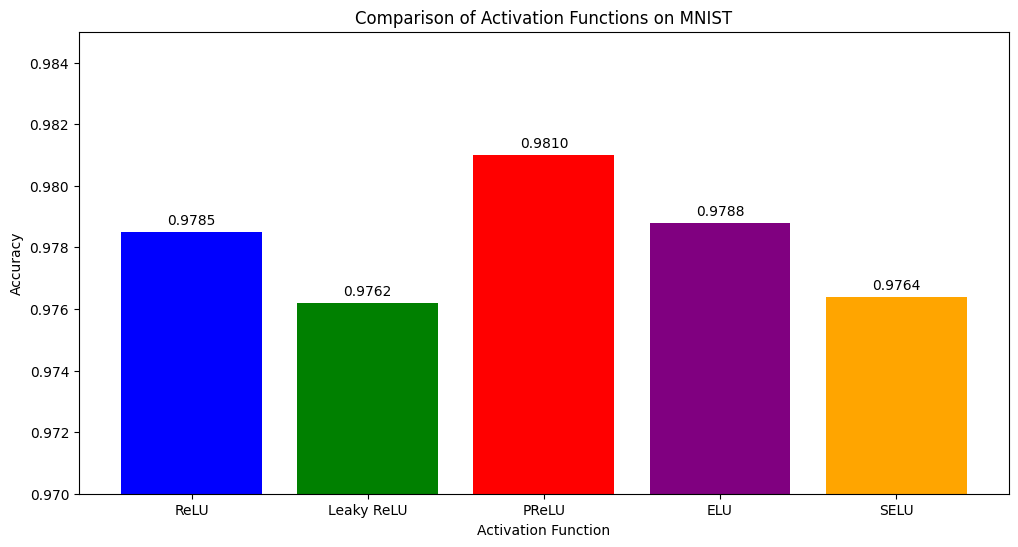

In [7]:
import matplotlib.pyplot as plt

# Plot the results with enhancements to show small variations
plt.figure(figsize=(12, 6), dpi=100)
bars = plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Comparison of Activation Functions on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Activation Function')
plt.ylim(0.97, 0.985)  # Set the y-axis range to highlight small variations

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}',  # Display the accuracy to 4 decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()
